In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from components.MiniBatchGradient import MiniBatchGradient

In [2]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.1,
    random_state=0
)

Begin training...
e0(err=54.969979595200414, acc=0.29)
e100(err=44.93767411915028, acc=0.49)
e200(err=44.807441917368486, acc=0.6)
e300(err=44.13934140585367, acc=0.69)
e400(err=32.96561158411805, acc=0.69)
e500(err=22.651360903478192, acc=0.71)
e600(err=20.90830025210274, acc=0.8)
e700(err=18.937334858722064, acc=0.89)
e800(err=16.093214102661367, acc=0.92)
e900(err=10.920794038640862, acc=0.96)
e1000(err=6.7747896305557544, acc=0.97)
e1100(err=5.054055133996615, acc=0.97)
e1200(err=4.282557455076683, acc=0.97)
e1300(err=3.9605048740252227, acc=0.96)
e1400(err=3.850644212018306, acc=0.96)
e1500(err=3.7928217117630814, acc=0.96)
e1600(err=3.736282888945483, acc=0.96)
e1700(err=3.6776286222770493, acc=0.96)
e1800(err=3.620397166760424, acc=0.97)
e1900(err=3.565947877009227, acc=0.97)
e1999(err=3.3034681383889604, acc=0.97)

Training done!!
Accuracy :  1.0
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1]


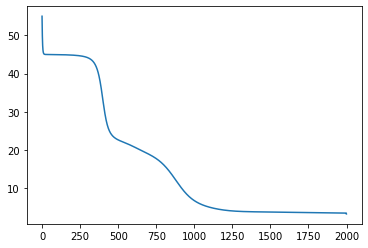

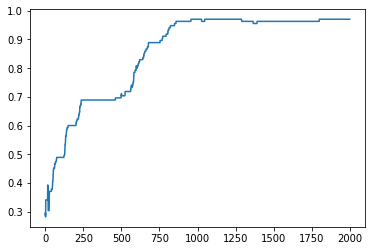

In [6]:
mbg = MiniBatchGradient([4, 5, 5, 5, 3], 32)
trainTarget = []
for target in y_train:
  if target == 0 :
    trainTarget.append([1, 0, 0])
  elif target == 1 :
    trainTarget.append([0, 1, 0])
  elif target == 2 :
    trainTarget.append([0, 0, 1])

print("Begin training...")
result = mbg.trainModel(X_train, trainTarget, 2000, 0.01, 0.01)
print("\nTraining done!!")
predictedTarget = mbg.predict(X_test)
acc = 0
for i in range(len(predictedTarget)):
  if predictedTarget[i] == y_test[i]:
    acc += 1
print("Accuracy : ", acc/len(X_test))
print(predictedTarget)
# print(X_test)

plt.plot(result["err"])
plt.show()
plt.plot(result["acc"])
plt.show()


In [4]:
from sklearn.neural_network import MLPClassifier

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
dataset = df.to_numpy()

numOfInputLayer = len(dataset[0]) - 1
numOfHiddenLayer = 3
outputLayer = len(set([data[-1] for data in dataset]))

classifier = MLPClassifier(
    hidden_layer_sizes=(numOfHiddenLayer), 
    max_iter= 2000, 
    activation='logistic', 
    solver='sgd', 
    batch_size= 32, 
    learning_rate_init= 0.1,
    random_state=1
)

classifier.fit(iris.data, iris.target)
sklearnResult = classifier.predict(iris.data)

numOfCorrectTarget = 0
for i in range(len(sklearnResult)):
	if (sklearnResult[i] == iris.target[i]):
		numOfCorrectTarget += 1
 
print("Sklearn Result\n****************************************************")
print('Num of Data          : ' + str(len(dataset)))
print('Accuracy             : ' + str(numOfCorrectTarget/len(dataset)))

Sklearn Result
****************************************************
Num of Data          : 150
Accuracy             : 0.9466666666666667
